## Importing

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models, Input
import matplotlib.pyplot as plt

## Dataset Loading

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Reshaping and Normalization

In [3]:
# Reshaping training data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizing training data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

## Model Formation

In [4]:
data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


model = models.Sequential([
    Input(shape=(28,28,1)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Model Compilation

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [6]:
model.fit(x_train, y_train, epochs=7, batch_size=32)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8778 - loss: 0.3856
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9531 - loss: 0.1517
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9646 - loss: 0.1144
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9696 - loss: 0.0975
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9741 - loss: 0.0849
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9758 - loss: 0.0762
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 16ms/step - accuracy: 0.9784 - loss: 0.0698


## Model Evaluation

In [7]:
_, acc = model.evaluate(x_test, y_test)
print(f"The Accuracy of the model is: {round(acc*100,2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0486
The Accuracy of the model is: 98.59%


## Model Saving

In [8]:
model.save('app.keras')
print('Model Saved Successfully')

Model Saved Successfully


## Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The prediction is: 7


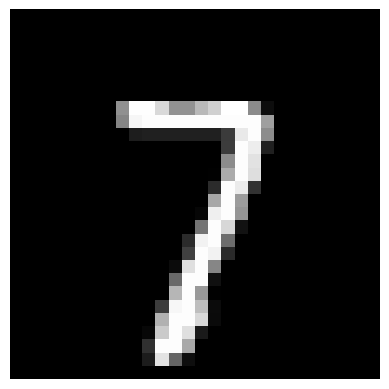

In [12]:
idx = 2301
img = x_test[idx]

image_reshape = np.expand_dims(img, axis=0)

prediction = model.predict(image_reshape)

print(f"The prediction is: {np.argmax(prediction)}")

plt.axis('off')
plt.imshow(img, cmap='gray')